## Prepare a prediction model for a profit of 50_startups data.                                        ~Gautam Mishra

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Numpy-Numerical Python that Deals with numbers.

Pandas-Used to analyse data.It has functions for analyzing,cleaning,exploring and manipulating Data.

Matplotlib-comprehensive library for creating static, animated, and interactive visualizations.

Seaborn-Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Warnings are provided to warn the developer of situations that aren’t necessarily exceptions and ignore them

In [24]:
df=pd.read_csv('50_Startups.csv')

Reading Csv file and storing it in a variable 'df'

In [25]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Displayng top 5 entries from data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


The dataset contains 50 rows and 5 columns with no null values.
Among 5 columns 4 columns are numerical columns and 1 column is object

In [27]:
df.duplicated().any()

False

The dataset does not contain duplicated value

In [28]:
from sklearn.preprocessing import LabelEncoder

We are importing LabelEncoder from sklearn.preprocessing.
LabelEncoder is used to transform non-numerical labels to numerical labels.

In [29]:
le=LabelEncoder()

Storing LabelEncoder in a variable le.

In [30]:
model=le.fit(df['State'])

fit is used to fit the encoder, with the help of le we fit the label and store it in 'model'

In [31]:
df['State']=model.transform(df['State'])

transform is used to transform categorical variable to numberical

In [32]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Our 'State' column is also now Numerical column now we can do predictions.

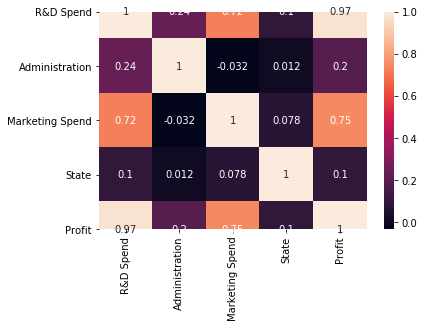

In [33]:
sns.heatmap(df.corr(),annot=True)

With respect to 'Profit' variable 'R&D Spend' and 'Marketing Spend' are strong positively co-related.

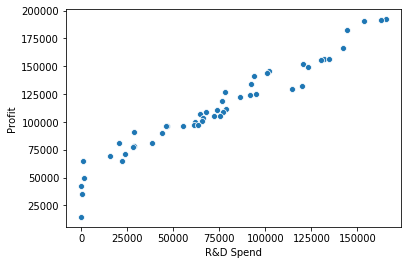

In [34]:
sns.scatterplot(df['R&D Spend'],df['Profit'])

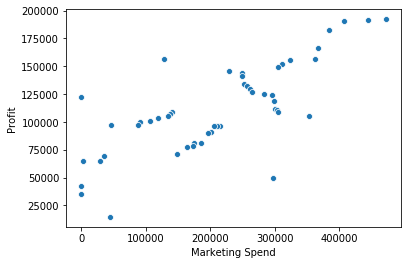

In [35]:
sns.scatterplot(df['Marketing Spend'],df['Profit'])

### Multiple Linear REgression

In [36]:
#Independent Variable or features

In [37]:
X=df.iloc[:,0:1]

In [38]:
#dependent Variable

In [39]:
y=df['Profit']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

In [44]:
#Fitting Linear Model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#Predictions
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R2 Score:",round(r2_score(y_train,y_pred_train),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2))
print("R2 Score:",round(r2_score(y_test,y_pred_test),2))

Train Data
RMSE: 9846.13
R2 Score: 0.94
Test Data
RMSE: 6392.7
R2 Score: 0.97


In [47]:
X_test.shape

(10, 1)

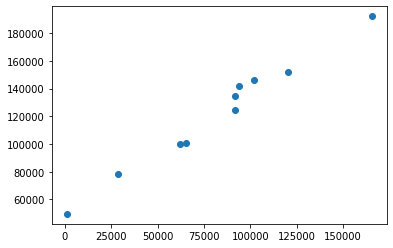

In [48]:
plt.scatter(X_test,y_test)

Text(0.5, 1.0, 'Sales Vs Tv Spending')

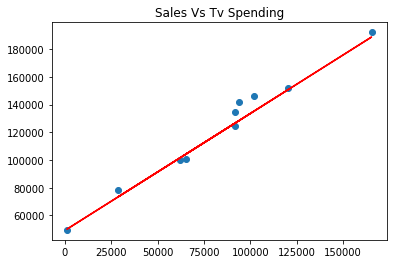

In [49]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,color='red')
plt.title('Sales Vs Tv Spending')

### Predictions

In [54]:
model.predict([[165]])

array([49160.36026615])

In [51]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96
